# Homework

This assignment involves forecasting with `prophet` on a new dataset

# Imports

In [2]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

# Data Load & Plotting

<AxesSubplot:xlabel='ds'>

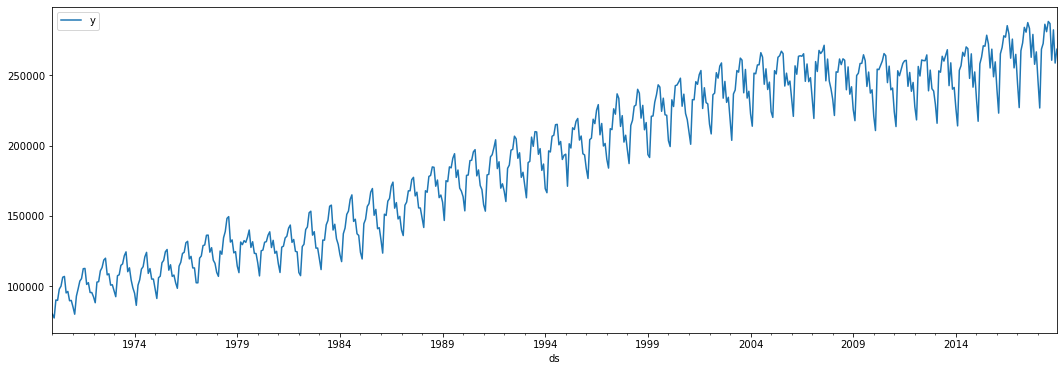

In [3]:
df = pd.read_csv('../../data/Miles_Traveled.csv')
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.plot(x='ds',y='y',figsize=(18,6))

# Problem 1: `Train/Test Split`

Define the test set as the last 12 months & the training set as everything else.

Print the shape of both splits

In [26]:
train = df.iloc[:576]
test = df.iloc[576:]
print("train.shape = ",train.shape)
print("test.shape = ",test.shape)

train.shape =  (576, 2)
test.shape =  (12, 2)


# Problem 2: `Prophet Forecasting`
* Create a prophet model
* Fit it to the training set
* Use it to forecast 12 months in the future
* Print the tail of the forecast

In [11]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)
forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263457.725002,274269.107918,285532.644352,263391.961620,263480.485446,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,0.0,0.0,0.0,279901.369516
584,2018-09-01,263600.413936,256221.985845,268019.152558,263521.393541,263645.489652,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,0.0,0.0,0.0,261926.128674
585,2018-10-01,263738.500000,263019.805607,275193.770861,263622.314214,263817.174316,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,0.0,0.0,0.0,269039.499421
586,2018-11-01,263881.188934,249579.311664,261371.361548,263737.049582,263990.886063,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,0.0,0.0,0.0,255666.543633
587,2018-12-01,264019.274999,250997.648732,262528.524080,263839.449836,264161.318400,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,0.0,0.0,0.0,257094.193073


# Problem 3: `Plot the Predictions vs True Miles`

Create a line chart that shows the predictions and true miles on a single plot

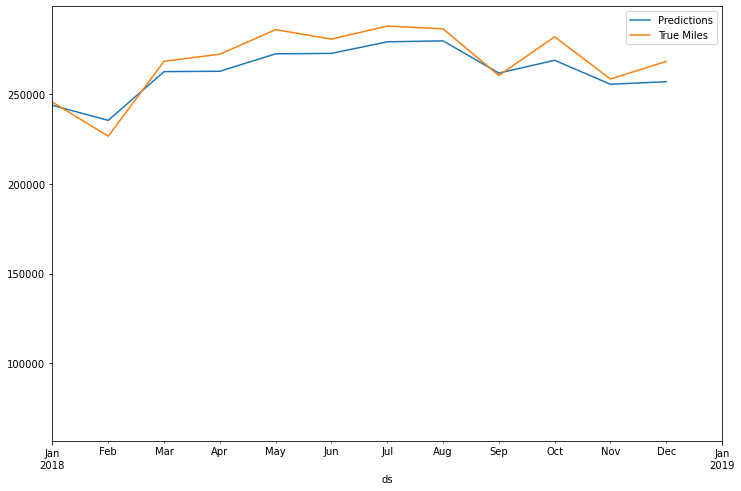

In [12]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'));

# Problem 4: `Use statsmodels to compute RMSE`
Get the predictions from the forecast's `yhat` & then use `statsmodels.tools.eval_measures`'s `rmse` function to compute & print RSME

In [27]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-12:]['yhat']
rmse_val = rmse(predictions,test['y'])
print("rmse_val = ",rmse_val)

rmse_val =  8588.50451989775


# Problem 5 `Prophet Diagnostics`

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

The initial period should be long enough to capture all of the components of the model, in particular seasonalities and extra regressors: at least a year for yearly seasonality, at least a week for weekly seasonality, etc.

Using the `initial`, `period`, `horizon` values below, use Prophet's `cross_validation` function to measure forecase error using historical data.  Print the head of the resultant cross validation data frame

In [4]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [23]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)
df_cv.head()

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087478,107074.589654,109963.963239,102445.0,1976-12-11
1,1977-02-01,102996.111557,101512.158637,104416.729565,102416.0,1976-12-11
2,1977-03-01,118973.318267,117478.627214,120291.787432,119960.0,1976-12-11
3,1977-04-01,120612.923861,119031.875642,122018.271378,121513.0,1976-12-11
4,1977-05-01,127883.031986,126286.138129,129332.919658,128884.0,1976-12-11


# Problem 6 : `Performance metrics`

Using the returned cross validation data frame, use Prophet's `performance_metrics` function to compute the metrics and display them

In [15]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.430030e+07,4929.533140,4534.578066,0.027790,0.023419,0.4
1,53 days,2.180221e+07,4669.283718,4269.242480,0.025045,0.023419,0.4
2,54 days,1.835927e+07,4284.771500,3749.319270,0.020183,0.022331,0.5
3,55 days,2.318231e+07,4814.801050,4262.593972,0.023194,0.023419,0.4
4,57 days,2.101189e+07,4583.872792,4000.766561,0.021482,0.022331,0.5
...,...,...,...,...,...,...,...
94,360 days,1.833685e+07,4282.155252,3750.317263,0.019550,0.019595,0.5
95,361 days,1.744517e+07,4176.741529,3472.704963,0.018164,0.018940,0.5
96,362 days,3.175299e+07,5634.978870,4397.649029,0.021959,0.024754,0.4
97,364 days,3.001684e+07,5478.762932,4235.776363,0.021356,0.021737,0.5


# Problem 7: `Plotting Cross Validation Metrics`
Use Prophet's `plot_cross_validation_metric` to plot the both the RMSE and MAPE metrics

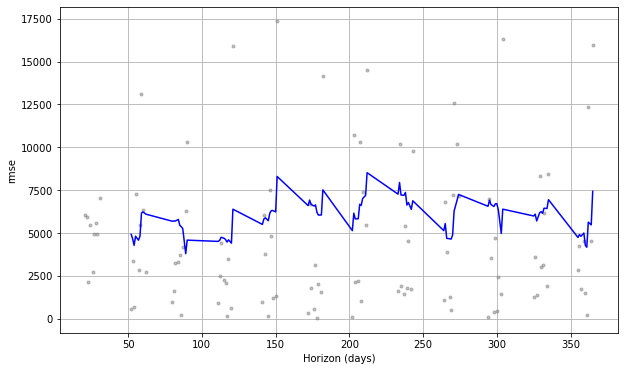

In [16]:
plot_cross_validation_metric(df_cv, metric='rmse');

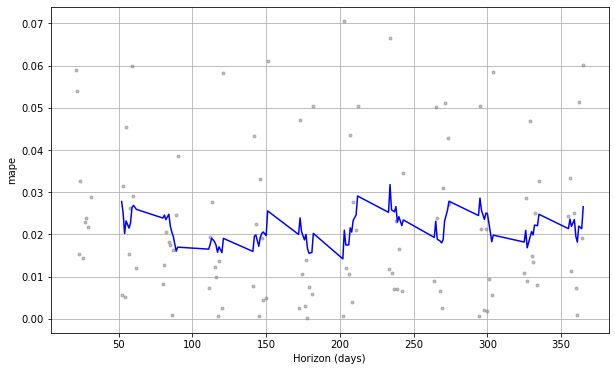

In [24]:
plot_cross_validation_metric(df_cv, metric='mape');